# Lecture 23-25: Numerical solutions for an example problem exhibiting fast-slow dynamics 

We solve the van der Pol oscillator problem, which is given by the system 

$$
\begin{align*}
\epsilon \dot{x} &= y - S(x) \\
\dot{y} &= -x
\end{align*}
$$

where $S(x) = 1/3 x^3 - x$

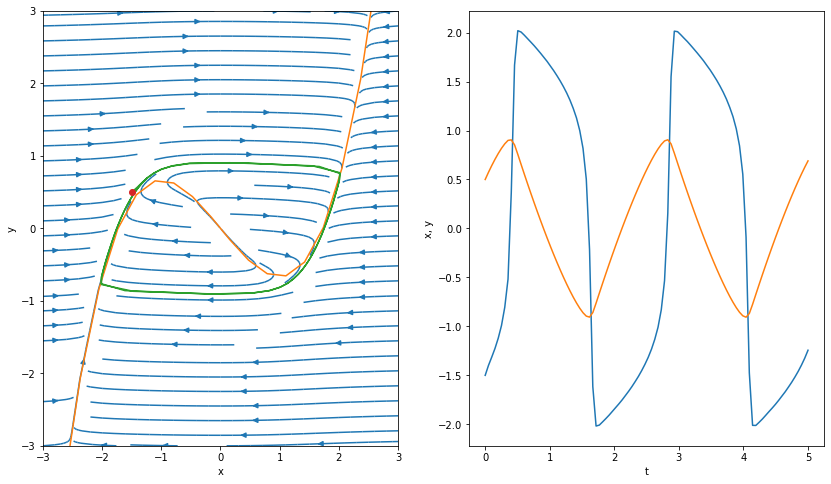

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

ep = 0.05;
S = lambda x: 1/3*x**3 - x
def f(t,Y):
    x, y = Y
    xp = 1/ep*(y + x - 1/3*x**3)
    yp = -x
    return [xp, yp]

xmin = -3.0; xmax = 3.0;
ymin = -3.0; ymax = 3.0;
x = np.linspace(xmin, xmax, 20)
y = np.linspace(ymin, ymax, 20)

X, Y = np.meshgrid(x, y)
u, v = np.zeros(X.shape), np.zeros(Y.shape)
NI, NJ = X.shape

for i in range(NI):
    for j in range(NJ):
        # arbitrary
        t = 0
        xx = X[i, j]
        yy = Y[i, j]
        fp = f(t,[xx, yy])
        u[i,j] = fp[0]
        v[i,j] = fp[1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,8))
ax1.streamplot(X,Y,u,v)
ax1.plot(x, S(x))

ax1.set(xlabel='x', ylabel='y', xlim=[xmin,xmax], ylim=[ymin,ymax])

# # Plot an example solution
# x0 = -1.5; y0 = S(x0);
x0 = -1.5; y0 = 0.5;
tstart = 0; tend = 5;
t = np.linspace(tstart, tend, 100)
sol = solve_ivp(f, [tstart, tend], [x0,y0], t_eval=t)

ax1.plot(sol.y[0,:],sol.y[1,:])
ax1.plot(x0, y0, 'o')

ax2.plot(sol.t, sol.y[0,:])
ax2.plot(sol.t, sol.y[1,:])
ax2.set(xlabel='t', ylabel='x, y');


## Investigation of different initial conditions

At the end of Chap. 23 in the notes, we discuss what happens for general initial conditions. What happens if we start with an initial condition that is away from the slow manifold? 

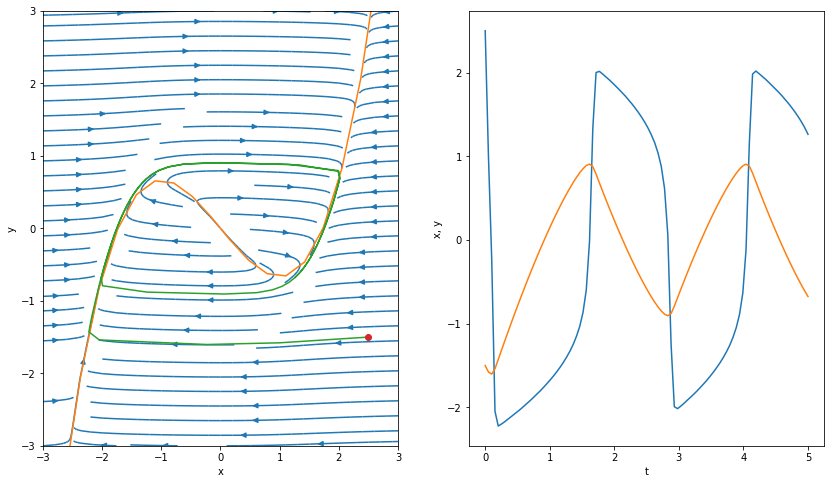

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,8))
ax1.streamplot(X,Y,u,v)
ax1.plot(x, S(x))

ax1.set(xlabel='x', ylabel='y', xlim=[xmin,xmax], ylim=[ymin,ymax])

# # Plot an example solution
# x0 = -1.5; y0 = S(x0);
x0 = 2.5; y0 = -1.5;
tstart = 0; tend = 5;
t = np.linspace(tstart, tend, 100)
sol = solve_ivp(f, [tstart, tend], [x0,y0], t_eval=t)

ax1.plot(sol.y[0,:],sol.y[1,:])
ax1.plot(x0, y0, 'o')

ax2.plot(sol.t, sol.y[0,:])
ax2.plot(sol.t, sol.y[1,:])
ax2.set(xlabel='t', ylabel='x, y');